In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import cvxpy as cp
import scipy as sc

# Generate a toy dataset
n_samples = 20
dim = 130000

X_train, Y = datasets.make_blobs(n_samples=n_samples, n_features=dim, centers=2, cluster_std=[2.0, 2.0], random_state=42)
Y = Y * 2 - 1
Y_train = np.reshape(Y, (len(Y), 1))
# print(X_train)
# print(Y_train)

#X = np.insert(X, 0, r, axis=1)
ss = sc.sparse.linalg.svds(X_train)
print(ss[1])
s0 = np.max(ss[0])
s1 = np.max(ss[1])
s2 = np.max(ss[2])

# print(s0)
# print(s1)
lr = 1/(s1**2)
print(1/(s1**2))



def SVM(x_train, y_train):
    # SVM

    s_s = cp.Variable((x_train.shape[1], 1))
    # b_s = cp.Variable()

    objective = cp.Minimize(cp.norm(s_s) ** 2)
    constraints = [cp.multiply(y_train, x_train @ s_s) >= 1]
    prob = cp.Problem(objective, constraints)

    prob.solve(solver = cp.SCS)
    s_s_value = s_s.value
    # b_s_value = b_s.value
    return s_s_value



def LogisticLoss(w, X, y, lam):
    # Computes the cost function for all the training samples
    m = X.shape[0]
    Xw = np.matmul(X,w)
    yT = y.reshape(-1,1)
    yXw = np.multiply(yT,Xw)
    #f = np.sum(np.logaddexp(0,-yXw)) + 0.5*lam*np.sum(w*w)
    f = np.sum(np.logaddexp(0, -yXw))
    gMul = np.exp(-yXw)/(1 + np.exp(-yXw))
    ymul = -1*yT*gMul
    #g =  np.matmul(ymul.reshape(1,-1),X) + lam*w.reshape(1,-1)
    g = np.matmul(ymul.reshape(1, -1), X)
    #g = np.dot(X.T,ymul) + lam*w.reshape(1,-1)
    g = g.reshape(-1, 1)
    return [f, g]


def model_logloss(x_train, y_train, num_iterations=20000, learning_rate=0.5):
    w_log = np.zeros((x_train.shape[1], 1))  # GRADED FUNCTION: initialize_with_zeros

    # Gradient descent
    # GRADED FUNCTION: optimize
    for i in range(num_iterations):
        # GRADED FUNCTION: propagate

        # dw_sl = np.dot(x_train.T, (np.dot(x_train, w_log) - y_train))
        # cost, dw_log = LogisticLossNaive(w_log, x_train, y_train, 1)

        [cost, dw_log] = LogisticLoss(w_log, x_train, y_train, 1)
        # print(cost)
        # print(dw_log)

        w_log = w_log - learning_rate * dw_log
        # cost = np.linalg.norm(x_train@w_sl - y_train)

        if (cost<1e-5):
                 break
        if (i-1000) % 10000 == 0:
            #costs.append(cost)
            print("Cost after iteration %i: %f" % (i, cost))
            # Print the cost every 1000 training examples
    return w_log


def train(feature,lr):
    w_log_in = model_logloss(X_train[:,:feature], Y_train, num_iterations=500000, learning_rate=lr)
    # print(w_log)
    w_s_in = SVM(X_train[:,:feature], Y_train)

    # print(w_log_norm[0:3])
    # print(w_s_norm[0:3])
    # print(w_s[0:3])
    # print(w_log[0:3])
    # print(distance2)
    return  w_log_in,w_s_in



# xp = np.linspace(np.min(X_train[:, 0]), np.max(X_train[:, 0]), 100)
# yp = - (w_s[0] * xp) / w_s[1]
# idx0 = np.where(Y_train == -1)
# idx1 = np.where(Y_train == 1)
#
# plt.plot(X_train[idx0, 0], X_train[idx0, 1], 'rx')
# plt.plot(X_train[idx1, 0], X_train[idx1, 1], 'bo')
# plt.plot(xp, yp, '--b', label='SVM')
#
# yp1 = - (w_log[0] * xp) / w_log[1]
# plt.plot(xp, yp1, '-r', label='log')
# plt.title('log')
# plt.legend()
# plt.show()



[ 725.59086168  726.55103085  727.97275881  729.33236419 6614.70562441
 6628.61965941]
2.275903265261601e-08


In [17]:
n_features_list = np.arange(10, dim+1, 100)
costs =[]
distances2 = []
distances2 = []
w_log_norms = []
w_s_norms = []
for feature in n_features_list:
    ss = sc.sparse.linalg.svds(X_train[:,:feature])
#     print(ss[1])
#     s0 = np.max(ss[0])
    s1 = np.max(ss[1])
#     s2 = np.max(ss[2])

    # print(s0)
    # print(s1)
    lr = 1/(s1**2)
    #print(feature)
    #print(1/(s1**2))
    if (feature-10 ) % 10000 == 0:
        print(feature)
    w_log, w_s = train(feature,lr*10000)
    w_log_norm = (w_log/np.linalg.norm(w_log))
    w_s_norm = w_s/np.linalg.norm(w_s)
    

    distance2 = np.linalg.norm(w_log_norm-w_s_norm)
    distances2.append(distance2)
    w_log_norms.append(w_log_norm)
    w_s_norms.append(w_s_norm)

10
10010
20010
30010
40010
50010
60010
70010
80010
90010
100010
110010
120010


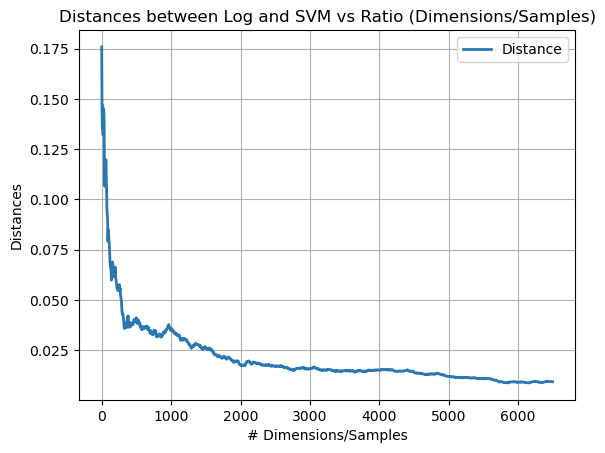

In [31]:
plt.plot(n_features_list/20,np.array(distances2), linewidth = 2,label='Distance',c='#2878B5')
# plt.scatter(n_features_list,distances2)

plt.xlabel("# Dimensions/Samples")
plt.ylabel("Distances")
plt.title("Distances between Log and SVM vs Ratio (Dimensions/Samples)")

plt.grid()
plt.legend()
plt.savefig('LogSVMdistance.jpg', dpi=300)
plt.show()

(1300,)


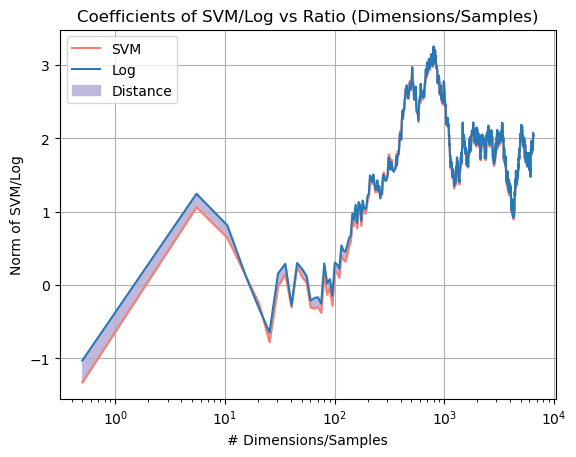

In [67]:
def dis (x):
    dists =[]
    for i in x:
#         dist = np.sum(np.abs(i))
        dist = np.sum(i)
        dists.append(dist)
    return dists
print(w_s_norms1.shape)
plt.plot(n_features_list/n_samples,dis(w_s_norms), label='SVM',c='#FA7F6F')#D76364
plt.plot(n_features_list/n_samples,dis(w_log_norms), label='Log',c='#2878B5')#2878B5
# plt.plot(np.log10(n_features_list/n_samples),dis(w_s_norms), label='SVM',c='#FA7F6F')#D76364
# plt.plot(np.log10(n_features_list/n_samples),dis(w_log_norms), label='Log',c='#2878B5')#2878B5
plt.fill_between(n_features_list/n_samples, dis(w_s_norms), dis(w_log_norms), label='Distance', color='#BEB8DC')#BEB8DC


# plt.xlim(10**-1, 10**4)
plt.xscale('log')
plt.xlabel("# Dimensions/Samples")
plt.ylabel("Coefficients sum of SVM/Log")
plt.title("Coefficients sum of SVM/Log vs Ratio (Dimensions/Samples)")

plt.grid()
plt.legend()
plt.savefig('LogSVMNorm.jpg', dpi=300)
plt.show()

In [22]:
fig=plt.figure(figsize=(8,6)) #新建画布
ax=plt.subplot(1,1,1) #子图初始化
ax.scatter(people_flow,confirm) #绘制散点图  

0.006682264616716232


         .-.
       .    .
      .      .
     .        .
    .          .
                .
                 .
